<a href="https://colab.research.google.com/github/Larsg7/ml1/blob/master/Ex4/ML1_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [0]:
def uniform():
    return np.random.uniform()


def gen_t(x):
    return np.sin(2 * np.pi * x) + 0.3 * np.random.normal()


def gen_point():
    x = uniform()
    return (x, gen_t(x))
 

In [0]:
L = 100
N = 25
PHI_0 = 1
lamb = np.exp(-2) 

In [0]:
data_full = np.array([[gen_point() for _ in range(N)] for _ in range(L)])

In [0]:
class LinRegression:
  def __init__(self, data, lamb):
    self._data_x = np.array(list(map(lambda x: x[0], data)))
    self._data_t = np.array(list(map(lambda x: x[1], data)))
    self.N = data.shape[0]
    self._weights = None
    self.lamb = lamb
    
  def gen_design_matrix(data):
    mu = np.linspace(0, 1, N - 1)
    def phi_i(x,i):
      return np.exp(-500 * (x - mu[i])**2)
    return np.array([[PHI_0] + [phi_i(x,i) for i in range(N - 1)] for x in data])
    
  def train(self):
    d_matrix = LinRegression.gen_design_matrix(self._data_x)
    t = self._data_t
    self._weights = np.linalg.solve(self.lamb * np.identity(t.shape[0]) + np.dot(d_matrix.T, d_matrix), np.dot(d_matrix.T, t))
    
  def predict(self, x):
    d_matrix = LinRegression.gen_design_matrix(x)
    return np.dot(d_matrix, self._weights)

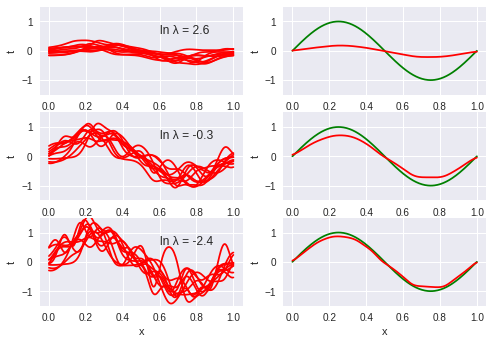

In [203]:
def train_all(data, lamb):
  r = []
  for d in data:
    l = LinRegression(d, lamb)
    l.train()
    r.append(l)
  return r

def plot_original(x):
  plt.plot(x, np.sin(2*np.pi*x), 'g')
  
x = np.linspace(0,1,250)

def plot_all(x, lamb, num=10):
  models = train_all(data_full[:num], lamb)
  for model in models:
    t = model.predict(x)
    plt.plot(x, t, 'r')
    
def average_all(x, lamb):
  models = train_all(data_full, lamb)
  ts = np.array([model.predict(x) for model in models])
  average_t = np.dot(ts.T, np.ones(len(models)).T) / len(models)
  plt.plot(x, average_t, 'r')
  
lambs = [np.exp(2.6), np.exp(-0.31), np.exp(-2.4)]

for i, lamb in enumerate(lambs):
  plt.subplot(3,2, 2 * i + 1)
  plot_all(x, lamb)
  plt.ylim(-1.5, 1.5)
  plt.text(0.6, 0.6, 'ln λ = {:.1f}'.format(np.log(lamb)))
  plt.ylabel('t')
  plt.xlabel('x')
  
  plt.subplot(3,2, 2 * i + 2)
  plot_original(x)
  average_all(x, lamb)
  plt.ylim(-1.5, 1.5)
  plt.ylabel('t')
  plt.xlabel('x')
  